In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
from bootstrap_utils import get_df, get_formatted_df, bootstrap
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'tom_project_metrics_Week1.csv'

In [3]:
df = get_df(path)

In [4]:
df.head(5)

,id,repo_fullname,commits_count,commits_days_since_first,commits_days_since_last,commits_total_lines_added,commits_total_lines_removed,commits_avg_added,commits_avg_removed,commits_avg_files_changed,commits_avg_message_length,commits_avg_per_day,commits_avg_per_day_real,commits_max_per_day,contributors_count,contributors_top_avg_commits,contributors_top_avg_participation_week,contributors_top_avg_additions,contributors_top_avg_deletions,forks_count,forks_avg_per_day,forks_avg_max_per_day,issues_total_comments,issues_count,issues_open,issues_labels,issues_avg_labels,issues_avg_closing_time,issues_avg_comment_time,issues_avg_comments,issues_avg_comment_length,issues_avg_title_length,issues_avg_body_length,issues_avg_per_day,issues_avg_per_day_real,issues_max_per_day,repo_size,repo_topics,repo_branches,repo_age_days,repo_workflows,repo_languages,repo_milestones,repo_watchers,repo_deployments,repo_readme_length,repo_network_members,pulls_count,pulls_total_lines_added,pulls_total_lines_removed,pulls_avg_lines_added,pulls_avg_lines_removed,pulls_avg_closing_time,pulls_avg_comments,pulls_avg_review_comments,pulls_avg_Commits,pulls_avg_body_length,pulls_avg_title_length,pulls_avg_files_changed,pulls_avg_labels,pulls_avg_created_per_day,pulls_avg_created_per_day_real,pulls_max_created_per_day,releases_count,releases_tags,releases_total_downloads,releases_avg_body_length,releases_avg_title_length,releases_avg_assets,releases_avg_assets_downloads,releases_avg_assets_size,releases_avg_downloads_per_day,stars_count,stars_avg_per_day_real,stars_max_per_day,wf_count,wf_avg_duration,wf_avg_success_duration,wf_avg_failure_duration,wf_avg_successes_per_day,wf_avg_successes_per_day_real,wf_avg_fails_per_day,created_at,updated_at
0,1,nthohuynh/K19-Java3,89.0,917.0,882.0,2341.0,44.0,26.0,0.0,5.0,35.0,NaN,18.0,83.0,27,2,1,15,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5761,0,2,917,0,1,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0.0,0.0,0.0,0,0,0,2022-02-28 10:55:26.475305,2022-02-28 10:55:26.475305
1,2,Azure-Samples/hdinsight-java-storm-wordcount,31.0,2224.0,1517.0,2154.0,680.0,69.0,22.0,3.0,28.0,NaN,3.0,5.0,2,14,5,51,17,10,0,1,4,3,1,0,0,0,0,1,349,38,3656,0,1,1,39,0,4,2224,0,1,0,9,0,8023,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,81,12,0,0,0,NaN,9,1,1,0,0.0,0.0,0.0,0,0,0,2022-02-28 10:56:00.08322,2022-02-28 10:56:00.08322
2,3,pete-arnold/data-science,88.0,905.0,27.0,5692.0,481.0,65.0,5.0,1.0,35.0,NaN,5.0,21.0,0,0,0,0,0,3,0,1,1,2,0,0,0,0,0,0,25,30,0,0,1,1,2251,0,10,905,0,1,0,0,0,391,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0.0,0.0,0.0,0,0,0,2022-02-28 10:56:57.668333,2022-02-28 10:56:57.668333
3,4,Azure-Samples/cognitive-services-personalizer-...,880.0,1035.0,321.0,870127.0,196902.0,989.0,224.0,5.0,51.0,NaN,9.0,114.0,24,23,3,981,394,59,0,2,39,66,1,8,0,0,0,0,135,41,1150,0,1,5,74628,0,8,1035,0,4,0,41,0,2543,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,25,547,0,47,1,21,65108289,NaN,40,1,2,0,0.0,0.0,0.0,0,0,0,2022-02-28 11:06:38.609609,2022-02-28 11:06:38.609609
4,5,Azure-Samples/Azure-Serverless-Twitter-Subscri...,12.0,1266.0,888.0,952.0,385.0,79.0,32.0,4.0,18.0,NaN,4.0,10.0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,545,0,1,1266,0,0,0,5,0,30958,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,312,0,44,1,312,544163,NaN,5,1,1,0,0.0,0.0,0.0,0,0,0,2022-02-28 11:06:57.610605,2022-02-28 11:06:57.610605


In [5]:
df.isna().sum()

id                                           0
repo_fullname                                0
commits_count                               14
commits_days_since_first                    14
commits_days_since_last                     14
commits_total_lines_added                   14
commits_total_lines_removed                 14
commits_avg_added                           14
commits_avg_removed                         14
commits_avg_files_changed                   14
commits_avg_message_length                  14
commits_avg_per_day                        467
commits_avg_per_day_real                    14
commits_max_per_day                         14
contributors_count                           0
contributors_top_avg_commits                 0
contributors_top_avg_participation_week      0
contributors_top_avg_additions               0
contributors_top_avg_deletions               0
forks_count                                  0
forks_avg_per_day                            0
forks_avg_max

In [6]:
df = get_formatted_df(df)

In [7]:
df.isna().sum()

commits_count                              0
commits_days_since_first                   0
commits_days_since_last                    0
commits_total_lines_added                  0
commits_total_lines_removed                0
commits_avg_added                          0
commits_avg_removed                        0
commits_avg_files_changed                  0
commits_avg_message_length                 0
commits_avg_per_day_real                   0
commits_max_per_day                        0
contributors_count                         0
contributors_top_avg_commits               0
contributors_top_avg_participation_week    0
contributors_top_avg_additions             0
contributors_top_avg_deletions             0
forks_count                                0
forks_avg_per_day                          0
forks_avg_max_per_day                      0
issues_total_comments                      0
issues_count                               0
issues_open                                0
issues_lab

In [8]:
df_means = [bootstrap(df.head(i)) for i in range(50, len(df), 50)]

In [9]:
intervals = {key:[] for key in df.keys()}
for i in range(len(df_means)):
    for key in df.keys():
        intervals[key].append([df_means[i][key].iloc[0], df_means[i][key].iloc[1], np.mean([df_means[i][key].iloc[0], df_means[i][key].iloc[1]])])
    

C:\Users\sasha\AppData\Local\Temp/ipykernel_18496/4159497063.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, 2, figsize=(12,3))


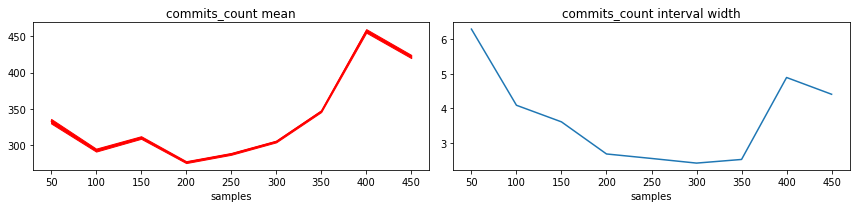

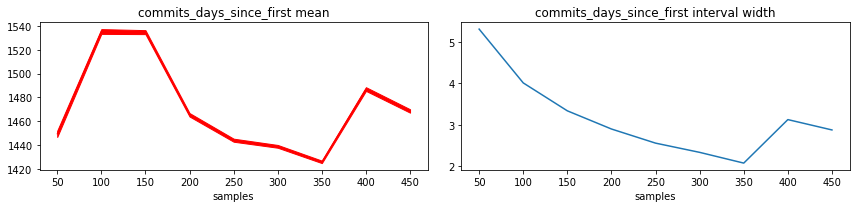

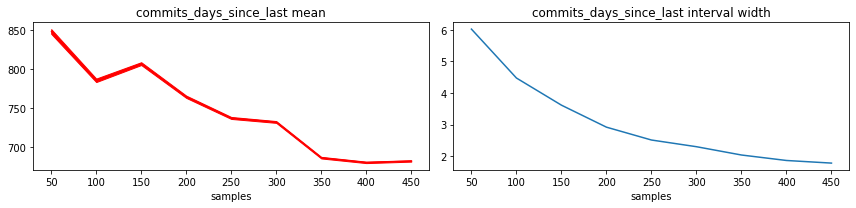

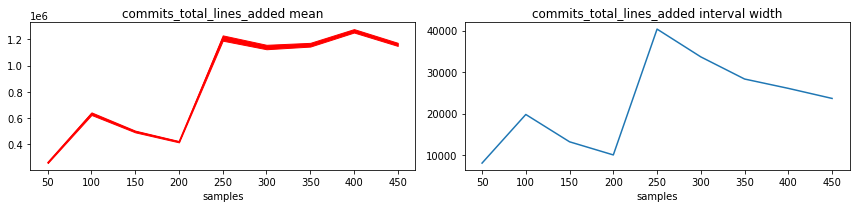

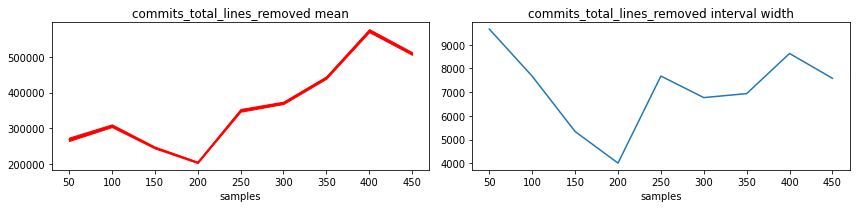

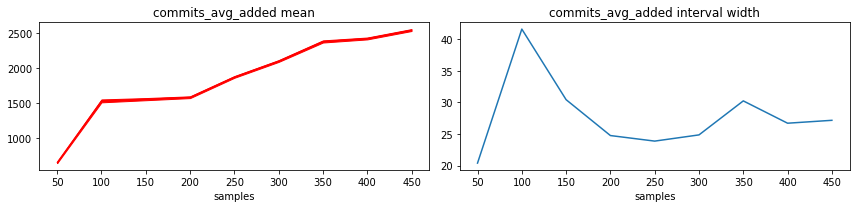

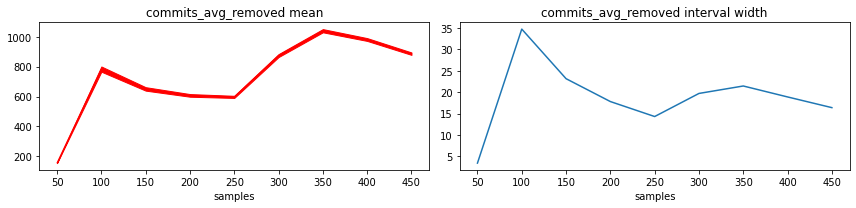

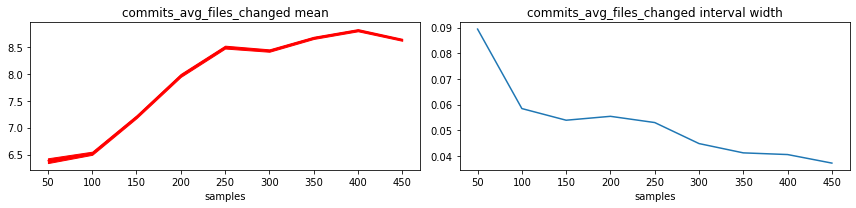

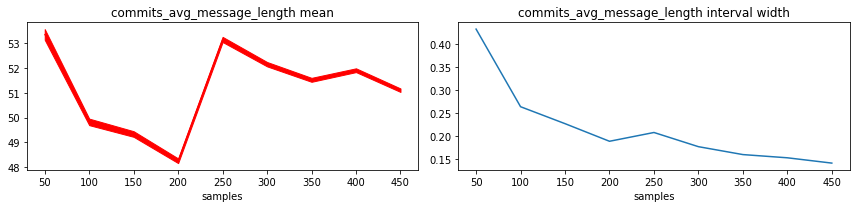

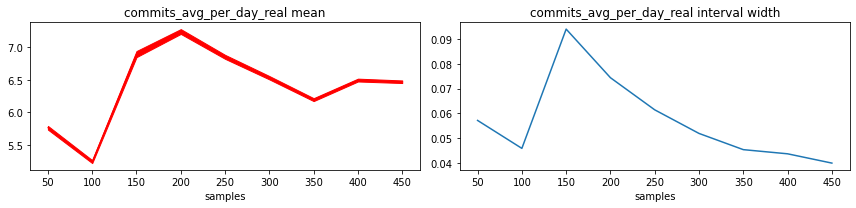

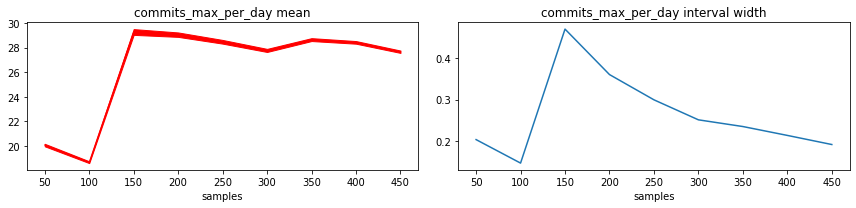

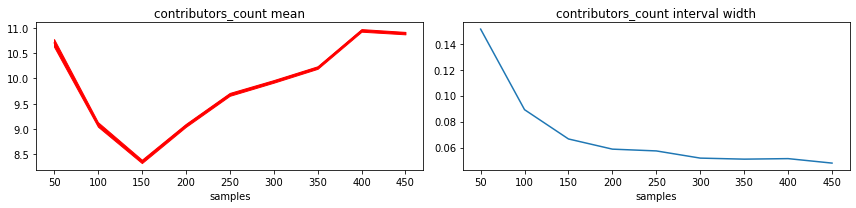

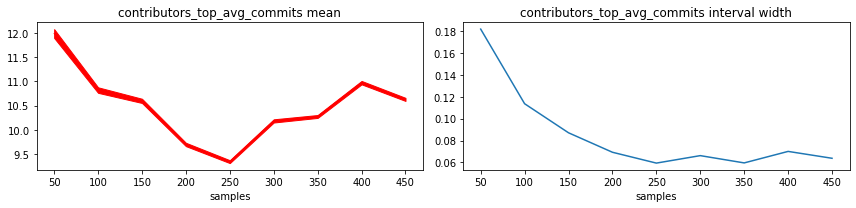

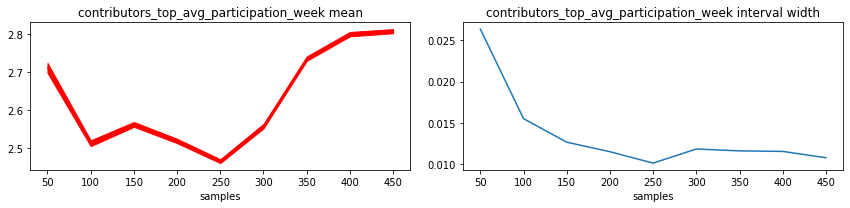

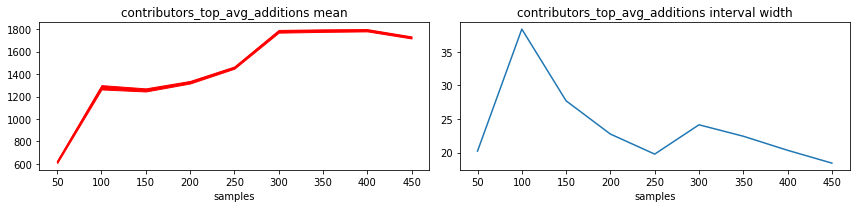

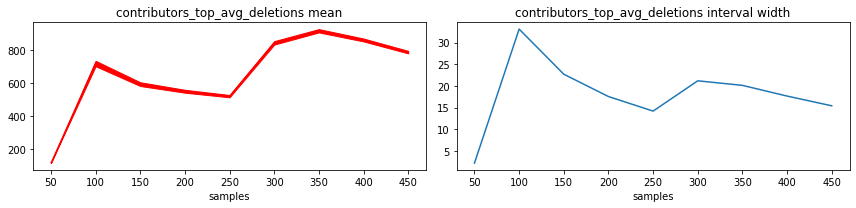

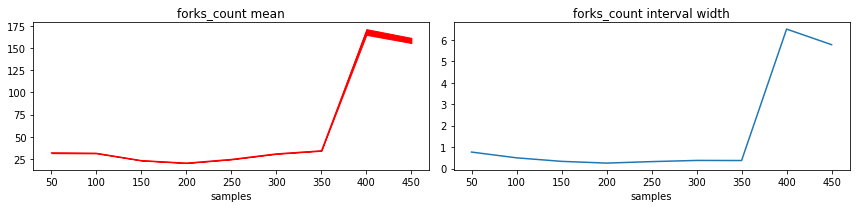

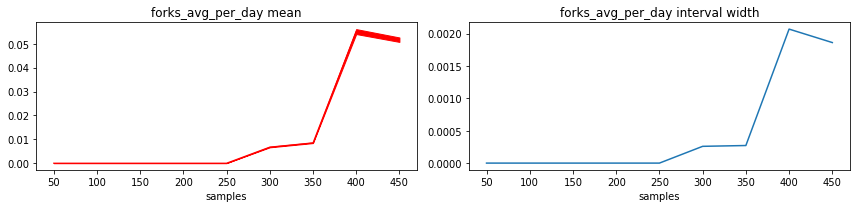

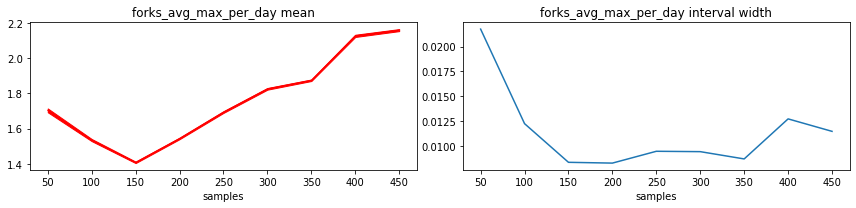

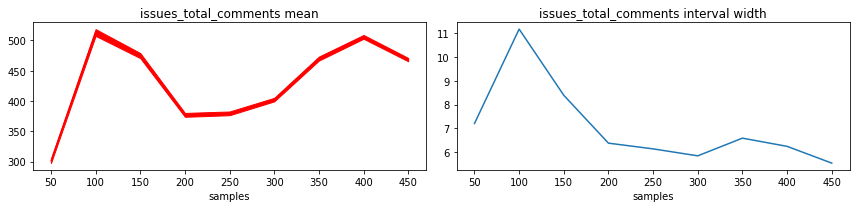

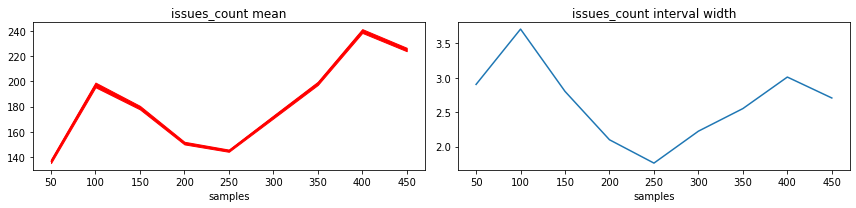

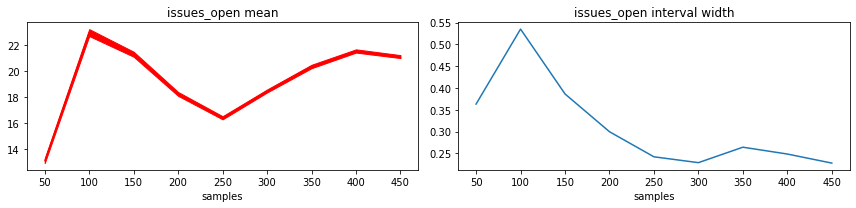

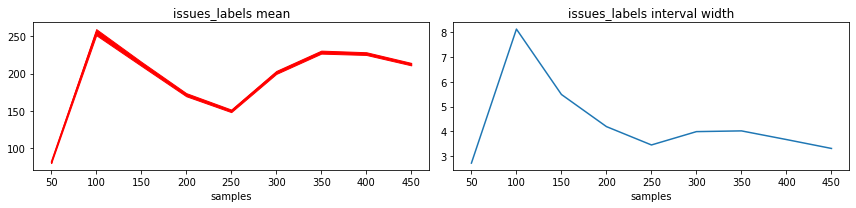

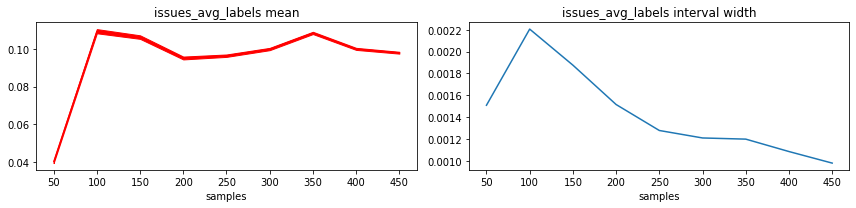

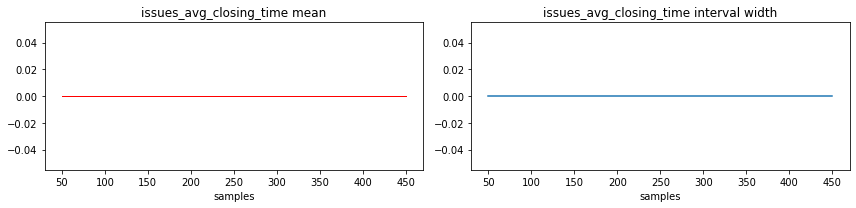

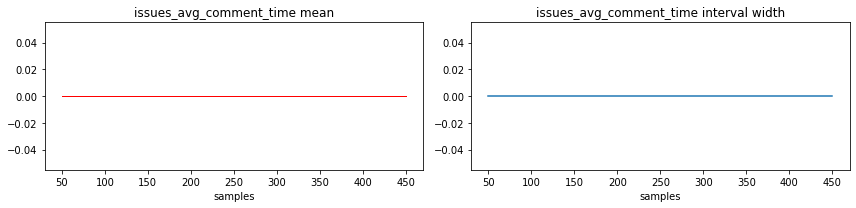

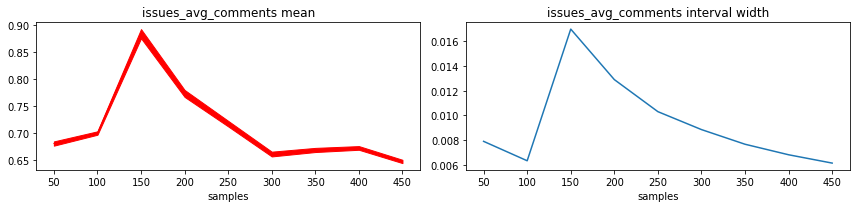

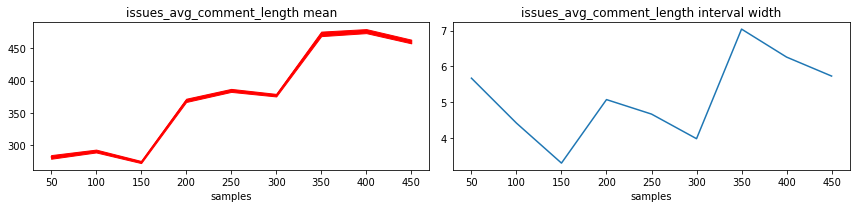

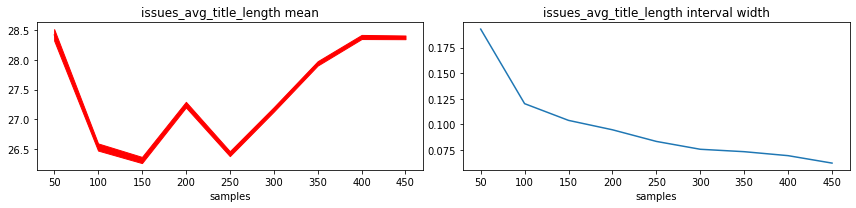

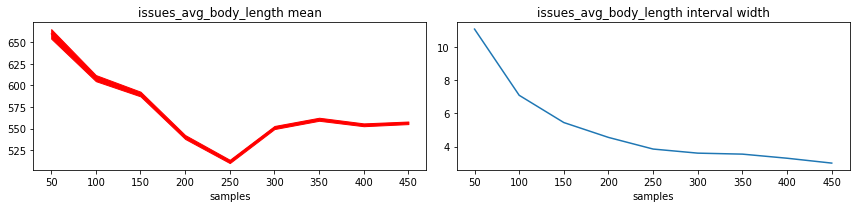

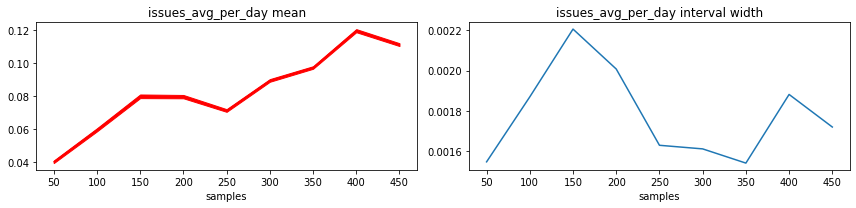

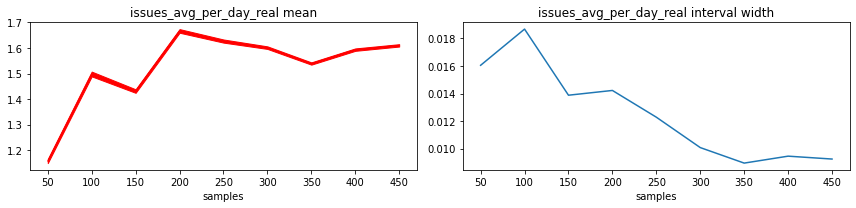

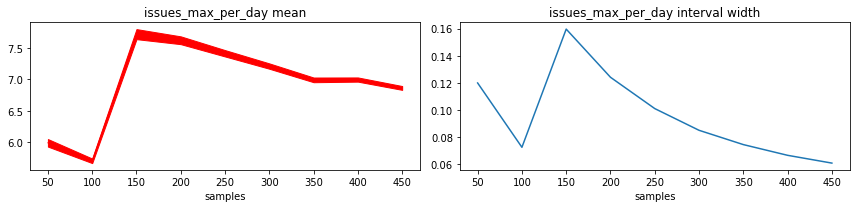

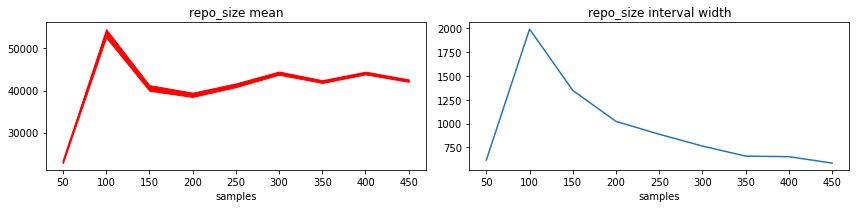

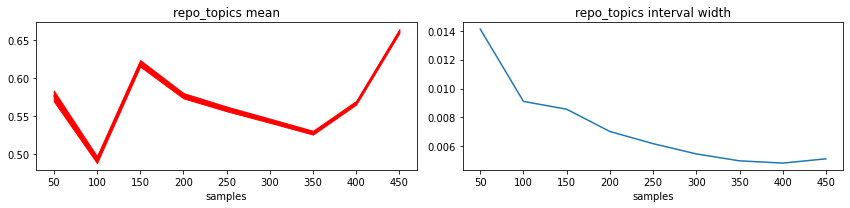

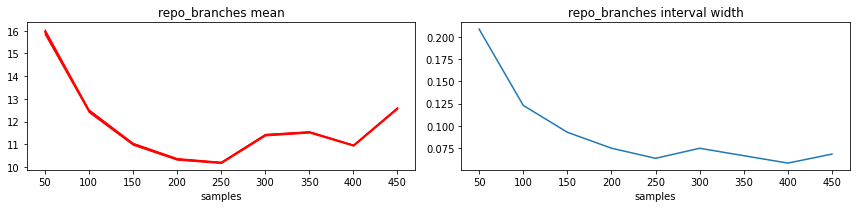

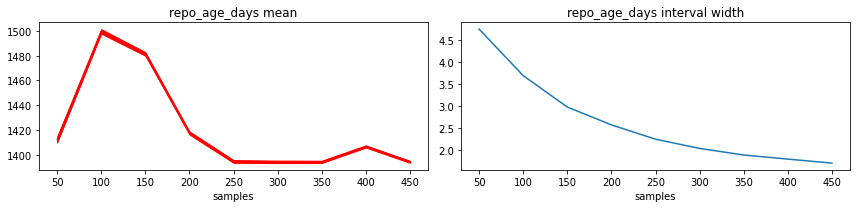

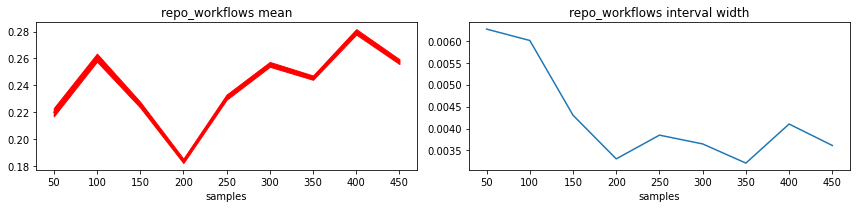

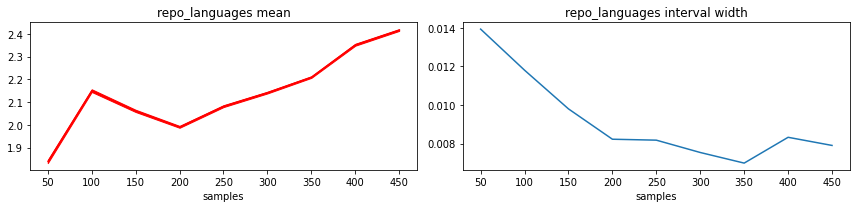

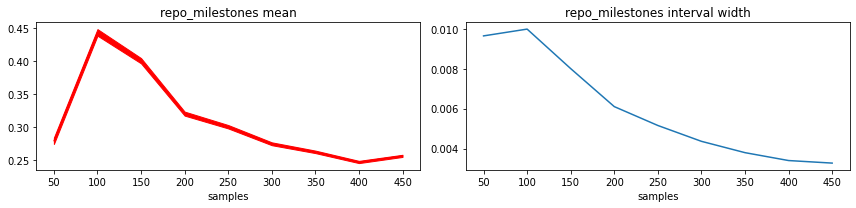

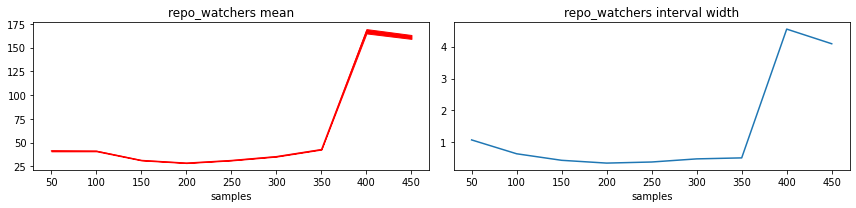

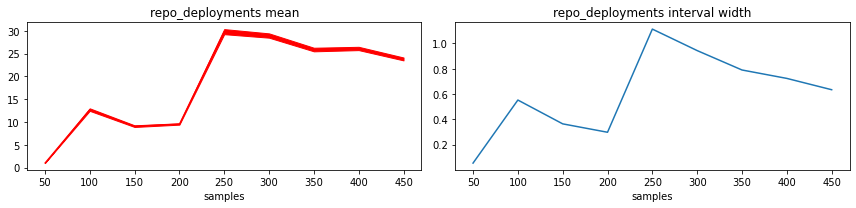

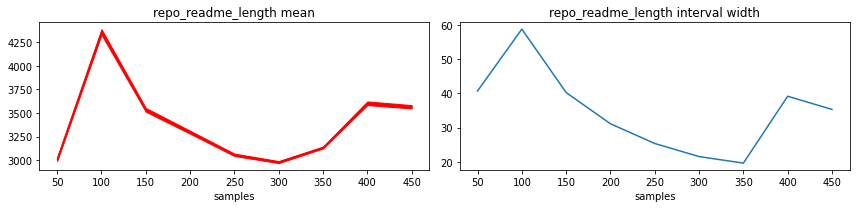

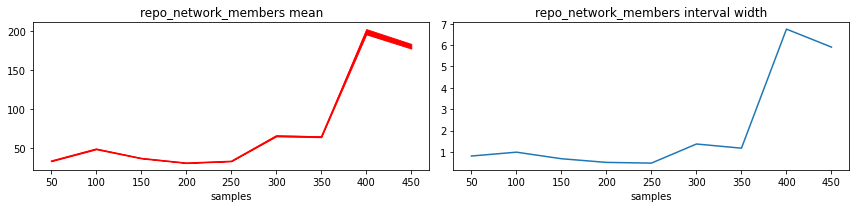

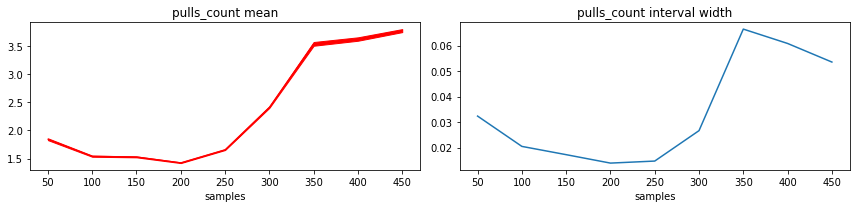

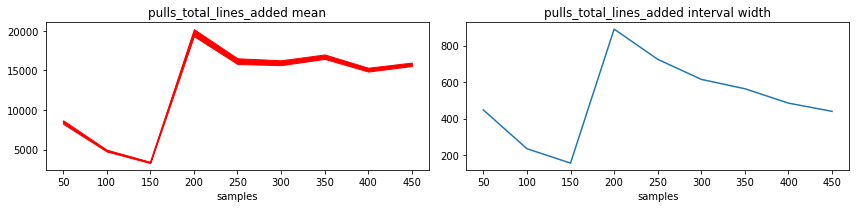

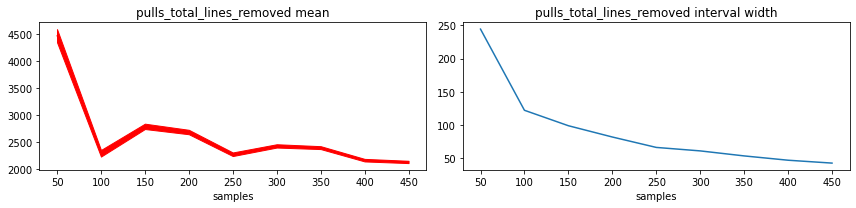

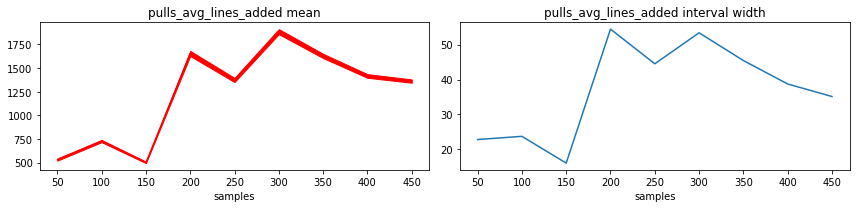

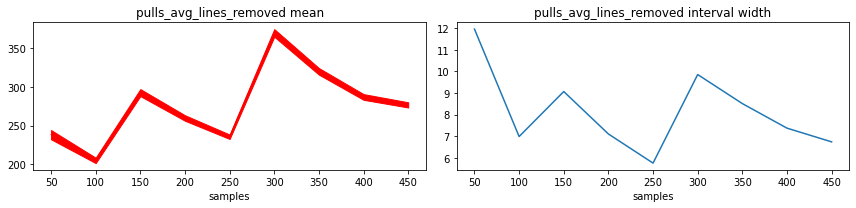

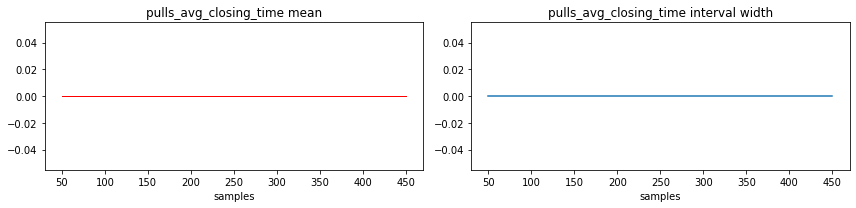

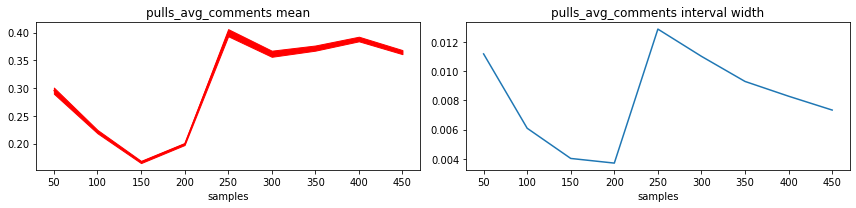

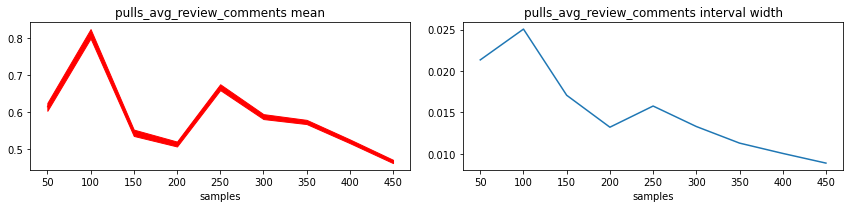

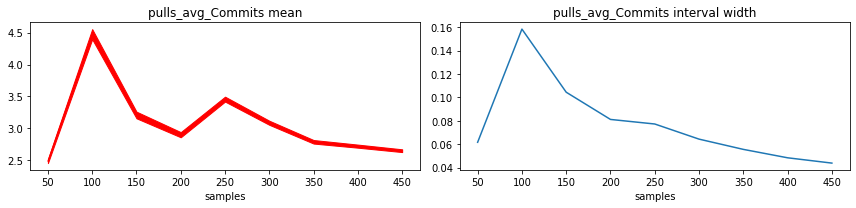

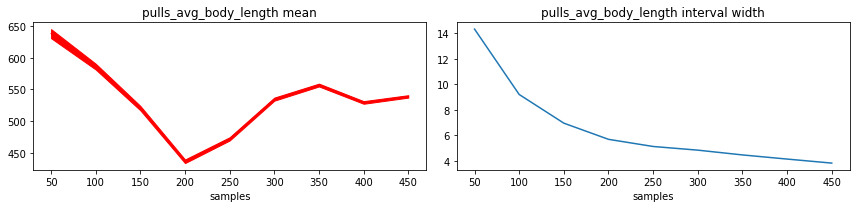

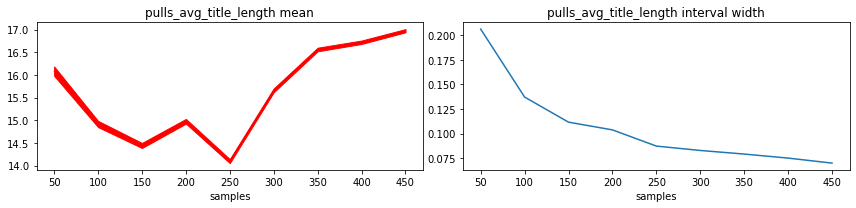

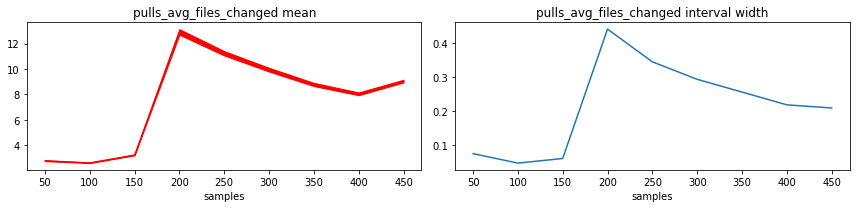

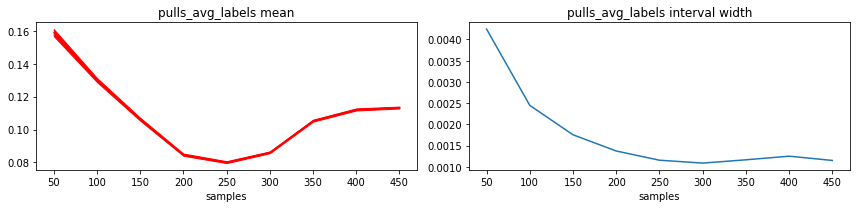

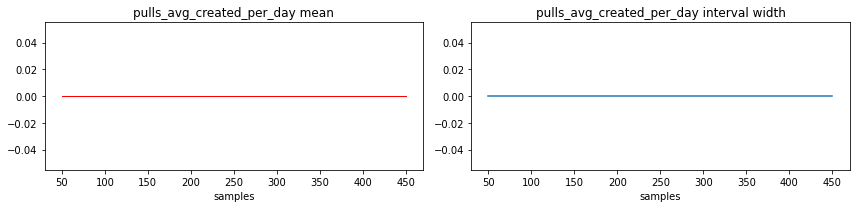

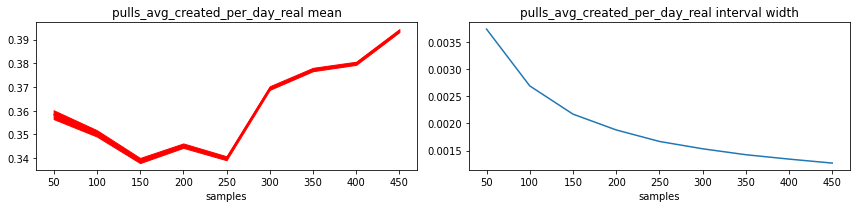

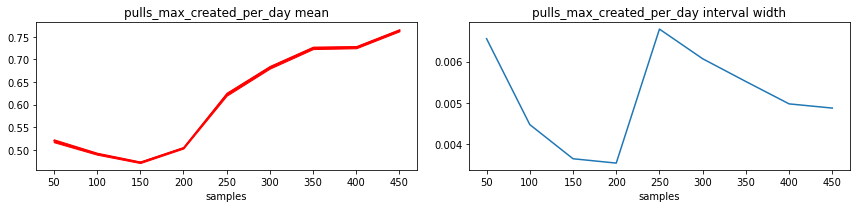

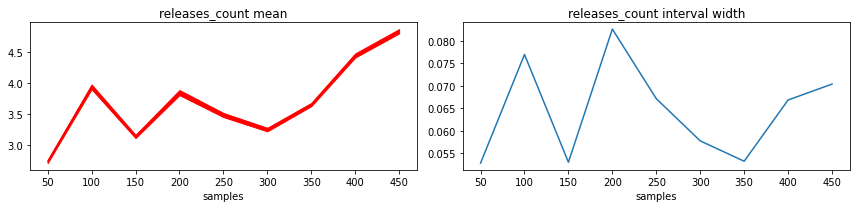

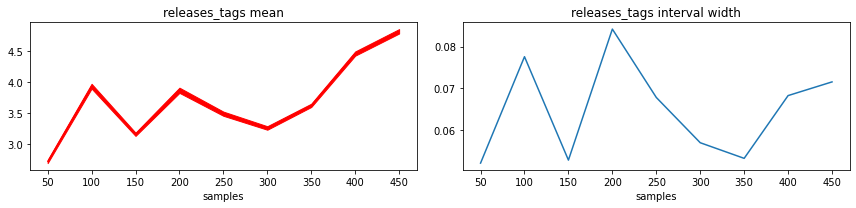

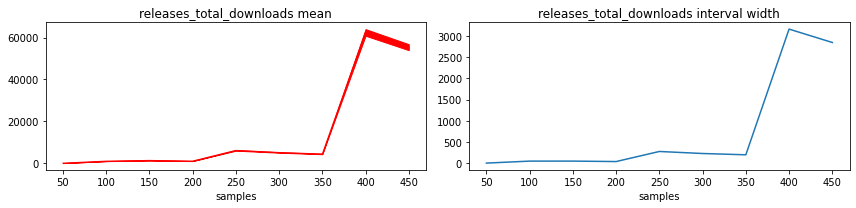

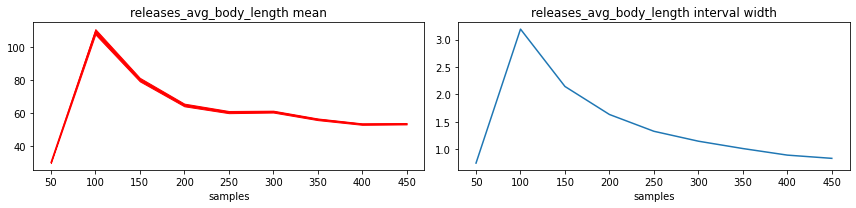

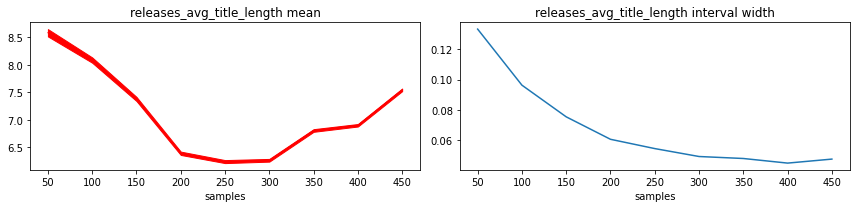

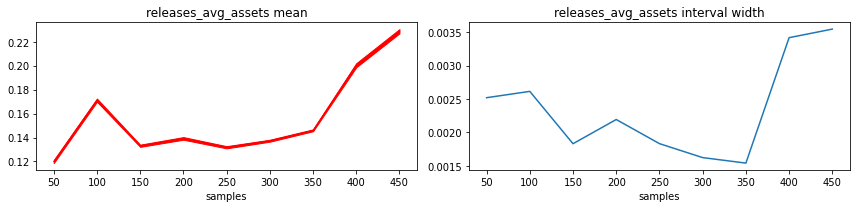

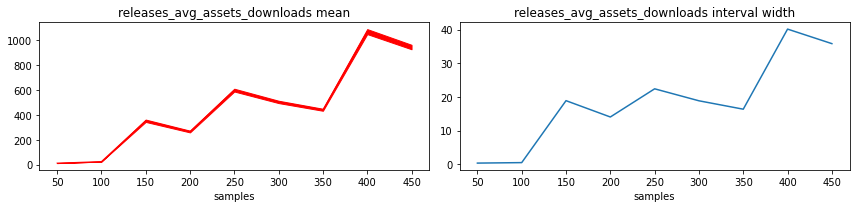

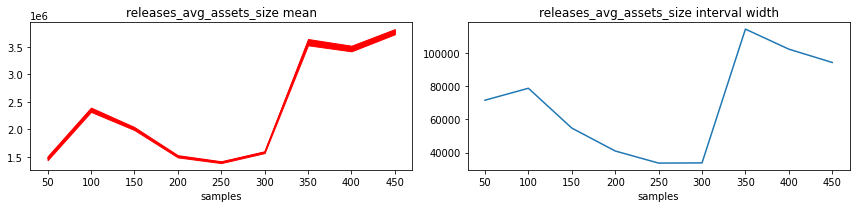

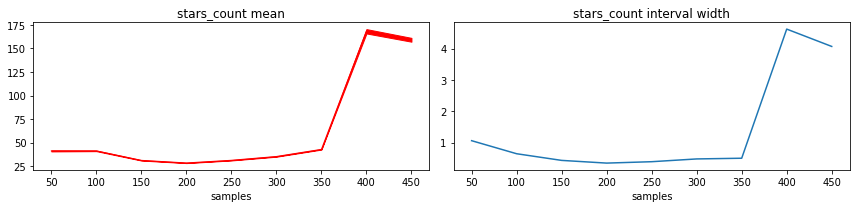

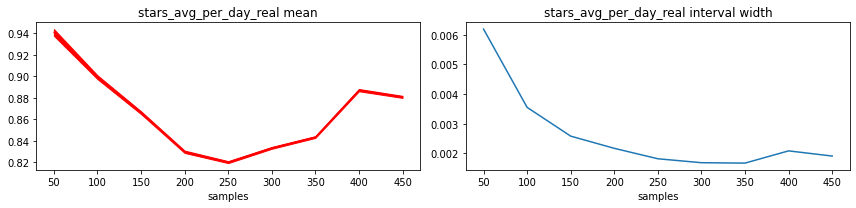

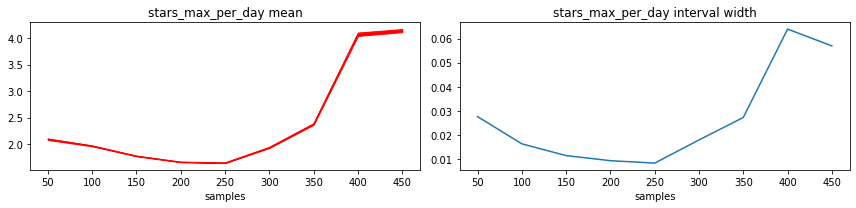

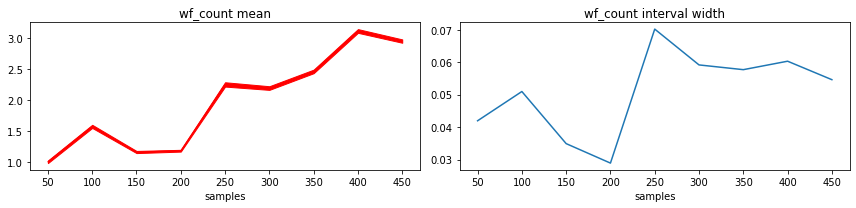

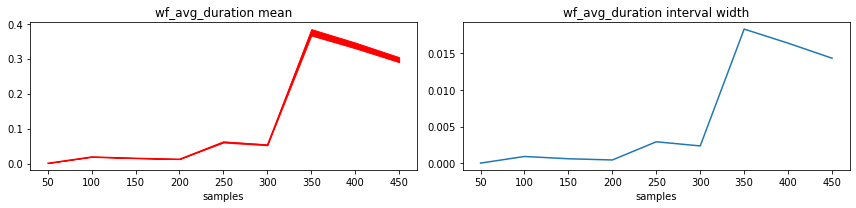

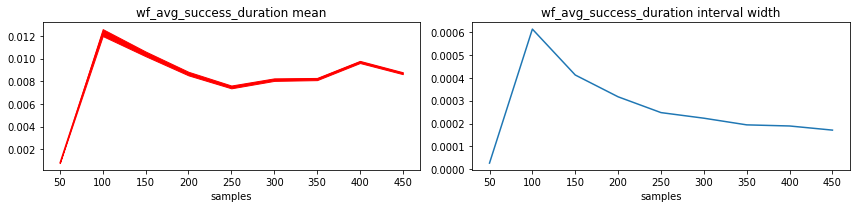

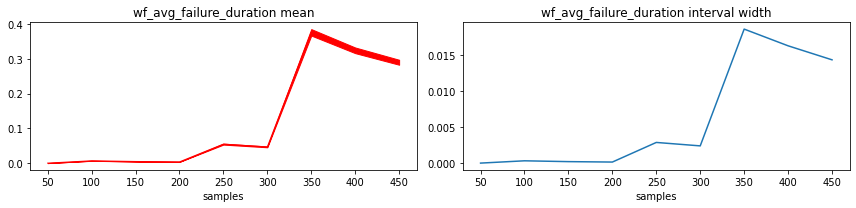

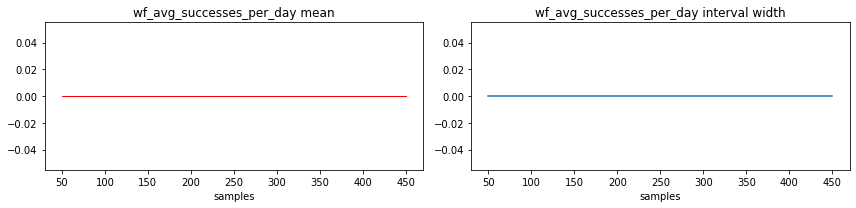

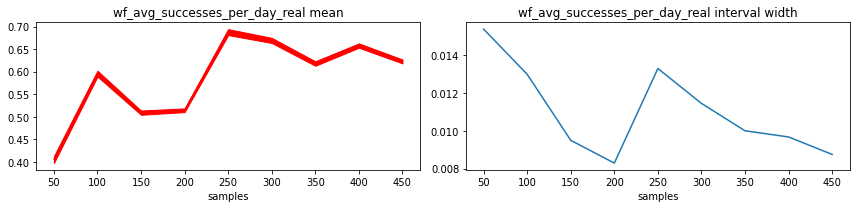

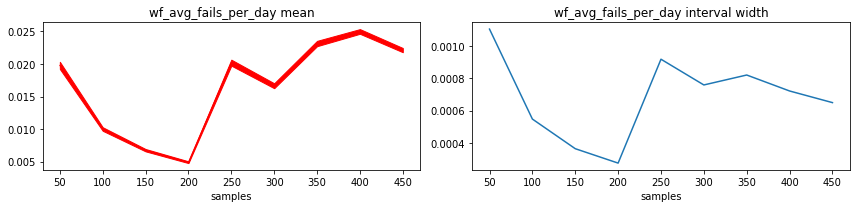

In [10]:
for key in df.keys():
    y = list(map(list, zip(*intervals[key])))
    f, ax = plt.subplots(1, 2, figsize=(12,3))
    ax[0].plot(np.arange(50, len(df), 50), y[2], color="red", lw=1)
    ax[0].set_title(key + " mean")
    ax[0].fill_between(np.arange(50, len(df), 50), y[0], y[1], color="red")  
    ax[0].set_xlabel("samples")
    ax[1].plot(np.arange(50, len(df), 50), np.array(y[1]) - np.array(y[0]))
    ax[1].set_title(key + " interval width")
    ax[1].set_xlabel("samples")
    f.tight_layout()